In [27]:
import pandas as pd
import numpy as np
import seaborn
from datetime import timedelta
import matplotlib.pyplot as plt

In [11]:
df=pd.read_excel('Walmart_Sales_CB1799BACC (2).xlsx')
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# group by in terms of City and Branch and derive total sales for C_30,C_60,C_90
df['Total'] = df['Unit price'] * df['Quantity']


Sales performance for the past 7 days:
        City Branch    Total
0   Mandalay      A  3295.18
1   Mandalay      B  1020.19
2   Mandalay      C  2777.48
3  Naypyitaw      A  2621.60
4  Naypyitaw      B  3585.61
5  Naypyitaw      C  2415.43
6     Yangon      A  2454.07
7     Yangon      B  4230.04
8     Yangon      C  1838.98


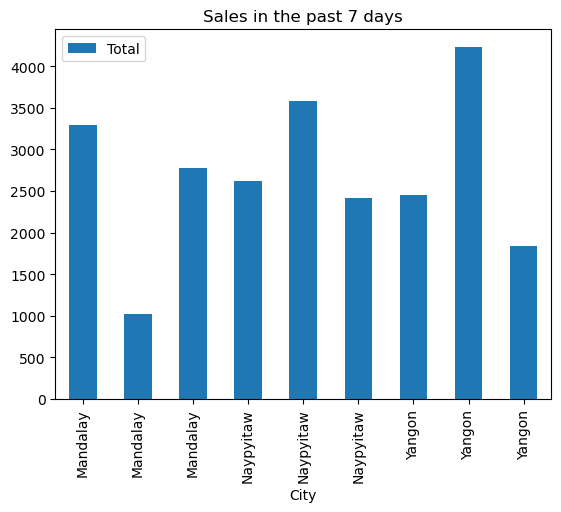


Sales performance for the past 30 days:
        City Branch     Total
0   Mandalay      A   9807.72
1   Mandalay      B   9511.35
2   Mandalay      C  14101.98
3  Naypyitaw      A  12394.83
4  Naypyitaw      B  11455.17
5  Naypyitaw      C  12451.90
6     Yangon      A  13336.13
7     Yangon      B  12321.16
8     Yangon      C  10860.26


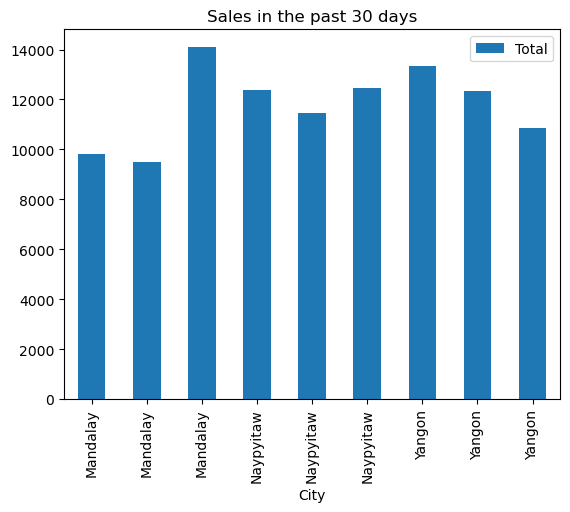


Sales performance for the past 60 days:
        City Branch     Total
0   Mandalay      A  21083.19
1   Mandalay      B  26629.87
2   Mandalay      C  22007.04
3  Naypyitaw      A  22511.10
4  Naypyitaw      B  24950.51
5  Naypyitaw      C  23822.56
6     Yangon      A  23791.90
7     Yangon      B  21560.29
8     Yangon      C  21245.64


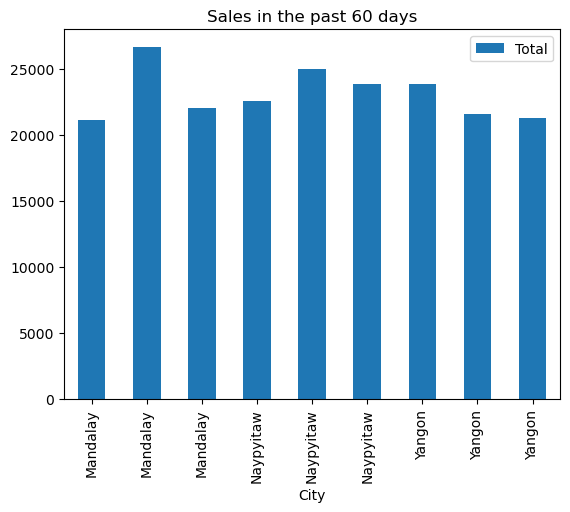


Sales performance for the past 90 days:
        City Branch     Total
0   Mandalay      A  34130.09
1   Mandalay      B  37215.93
2   Mandalay      C  29794.62
3  Naypyitaw      A  35985.64
4  Naypyitaw      B  35157.75
5  Naypyitaw      C  34160.14
6     Yangon      A  33647.27
7     Yangon      B  35193.51
8     Yangon      C  32302.43


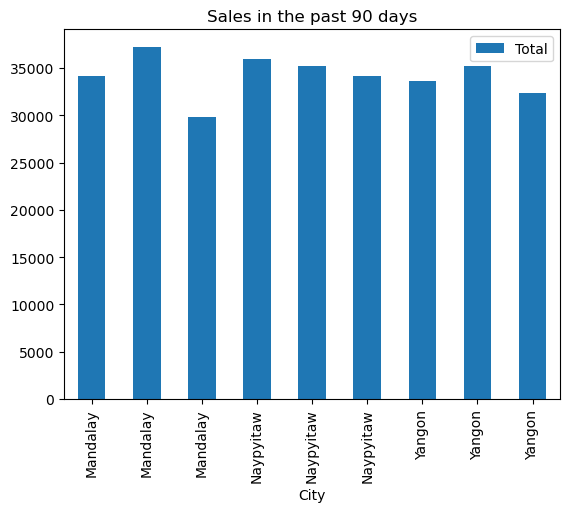

In [32]:
# most recent date in the data
recent_date_data=df['Date'].sort_values(ascending=False).reset_index()
recent_date=recent_date_data.at[0,'Date']
for suffix in [7,30,60,90]:
    start_date = recent_date - timedelta(days=suffix)
    
    # Filter the DataFrame for records within the period
    recent_period = df[df['Date'] >= start_date]
    sales_performance_city_branch = recent_period.groupby(['City', 'Branch'])['Total'].sum().reset_index()
    
    print(f"\nSales performance for the past {suffix} days:")
    print(sales_performance_city_branch)
    
    # Optionally, you can visualize the data
    sales_performance_city_branch.plot(x='City', y='Total', kind='bar', title=f'Sales in the past {suffix} days')
    plt.show()

## Part B AVG Price of item at each branch

In [36]:
df['avg_past_7'] = None
df['avg_past_30'] = None
df['avg_past_60'] = None
df['avg_past_90'] = None
for suffix in [7, 30, 60, 90]:
    start_date = recent_date - timedelta(days=suffix)
    
    # Filter data for the given time period
    recent_period = df[df['Date'] >= start_date]
    avg_price_per_item = recent_period.groupby(['City', 'Branch', 'Product line'])['Unit price'].mean().reset_index()
    
    # Store the average price for each branch and item in the new column corresponding to the period
    if suffix == 7:
        df.loc[df['Date'] >= start_date, 'avg_past_7'] = avg_price_per_item['Unit price']
    elif suffix == 30:
        df.loc[df['Date'] >= start_date, 'avg_past_30'] = avg_price_per_item['Unit price']
    elif suffix == 60:
        df.loc[df['Date'] >= start_date, 'avg_past_60'] = avg_price_per_item['Unit price']
    elif suffix == 90:
        df.loc[df['Date'] >= start_date, 'avg_past_90'] = avg_price_per_item['Unit price']
    
    # Print average price for each item in the branch
    print(f"\nAverage price of items sold for the past {suffix} days:")
    print(avg_price_per_item)


Average price of items sold for the past 7 days:
         City Branch            Product line  Unit price
0    Mandalay      A  Electronic accessories   45.710000
1    Mandalay      A      Food and beverages   93.400000
2    Mandalay      A       Health and beauty   73.643333
3    Mandalay      A      Home and lifestyle   99.920000
4    Mandalay      A       Sports and travel   59.080000
5    Mandalay      B  Electronic accessories   55.670000
6    Mandalay      B     Fashion accessories   30.370000
7    Mandalay      B      Food and beverages   29.150000
8    Mandalay      B       Health and beauty   72.570000
9    Mandalay      B      Home and lifestyle   12.290000
10   Mandalay      B       Sports and travel   39.120000
11   Mandalay      C  Electronic accessories   52.890000
12   Mandalay      C     Fashion accessories   75.145000
13   Mandalay      C      Food and beverages   32.320000
14   Mandalay      C       Health and beauty   78.320000
15   Mandalay      C       Sports and 

### PART C ANALZE THE PERFORMACE OF SALES AND REVENCE GROWTH BY GROWTH MONTH BY MONTH OVER PRODUCT LINE , GENDER , PAYMENT

In [46]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby(['Month', 'Product line', 'Gender', 'Payment']).agg(total_sales=('Total', 'sum'),total_quantity=('Quantity', 'sum')).reset_index()
monthly_sales

,Month,Product line,Gender,Payment,total_sales,total_quantity
0,2019-01,Electronic accessories,Female,Cash,2731.86,52
1,2019-01,Electronic accessories,Female,Credit card,3045.42,54
2,2019-01,Electronic accessories,Female,Ewallet,1576.48,43
3,2019-01,Electronic accessories,Male,Cash,3380.29,62
4,2019-01,Electronic accessories,Male,Credit card,2248.65,43
...,...,...,...,...,...,...
103,2019-03,Sports and travel,Female,Credit card,2863.86,52
104,2019-03,Sports and travel,Female,Ewallet,3398.57,53
105,2019-03,Sports and travel,Male,Cash,2084.19,36
106,2019-03,Sports and travel,Male,Credit card,3633.90,60
